Data Sample:
   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0        0               0  
1  M2044282225             0.0             0.0        0               0  
2   C553264065             0.0             0.0        1               0  
3    C38997010         21182.0             0.0        1               0  
4  M1230701703             0.0             0.0        0               0  

Missing Values in Each Column:
step              0
type              0
amount            0


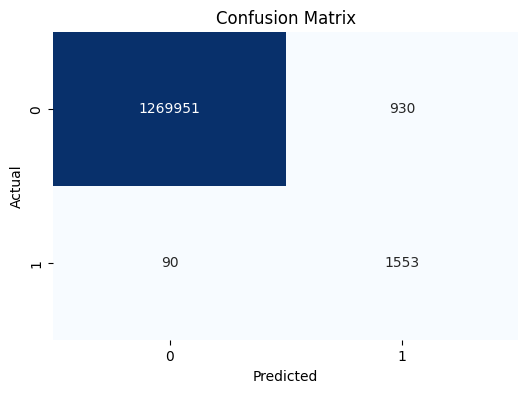

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

from imblearn.over_sampling import SMOTE


data = pd.read_csv(r"D:\College\6th semester\Data Science\Project\Dataset 1\Synthetic_Financial_datasets_log.csv")

print("Data Sample:")
print(data.head())

print("\nMissing Values in Each Column:")
print(data.isnull().sum())

print("\nClass Distribution:")
print(data['isFraud'].value_counts())


data = data.drop(columns=['nameOrig', 'nameDest', 'isFlaggedFraud'])

data = pd.get_dummies(data, columns=['type'], drop_first=True)

X = data.drop(columns=['isFraud'])
y = data['isFraud']


X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y
)


smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("\nResampled Class Distribution:")
print(pd.Series(y_train_resampled).value_counts())


rf_classifier = RandomForestClassifier(n_estimators=5, random_state=42,n_jobs=1)

rf_classifier.fit(X_train_resampled, y_train_resampled)


y_pred = rf_classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)

print("\nConfusion Matrix:")
print(cm)

print("\nClassification Report:")
print(cr)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()



Confusion Matrix:
[[1251559   19322]
 [     16    1627]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99   1270881
           1       0.08      0.99      0.14      1643

    accuracy                           0.98   1272524
   macro avg       0.54      0.99      0.57   1272524
weighted avg       1.00      0.98      0.99   1272524



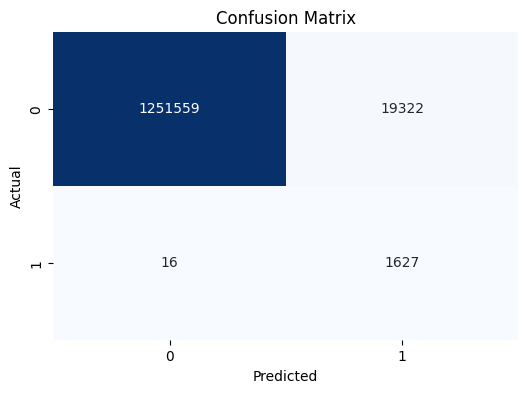

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report


data = pd.read_csv(r"D:\College\6th semester\Data Science\Project\Dataset 1\Synthetic_Financial_datasets_log.csv")

data = data.drop(columns=['nameOrig', 'nameDest', 'isFlaggedFraud'])

data = pd.get_dummies(data, columns=['type'], drop_first=True)

X = data.drop(columns=['isFraud'])
y = data['isFraud']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


rf_classifier = RandomForestClassifier(
    n_estimators=60,      
    max_depth=10,        
    class_weight='balanced',  
    random_state=42,
    n_jobs=-1            
)

rf_classifier.fit(X_train, y_train)


y_pred = rf_classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)

print("\nConfusion Matrix:")
print(cm)
print("\nClassification Report:")
print(cr)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [4]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

data = pd.read_csv(r"D:\College\6th semester\Data Science\Project\Dataset 1\Synthetic_Financial_datasets_log.csv")

data = data.drop(columns=['nameOrig', 'nameDest', 'isFlaggedFraud'])

data = pd.get_dummies(data, columns=['type'], drop_first=True)

X = data.drop(columns=['isFraud'])
y = data['isFraud']


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


xgb_classifier = xgb.XGBClassifier(
    n_estimators=200,        
    max_depth=6,             
    learning_rate=0.1,       
    scale_pos_weight=y_train.value_counts()[0] / y_train.value_counts()[1],  
    subsample=0.8,           
    colsample_bytree=0.8,    
    random_state=42,
    n_jobs=-1                
)

xgb_classifier.fit(X_train, y_train)


y_pred = xgb_classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)

print("\nConfusion Matrix:")
print(cm)
print("\nClassification Report:")
print(cr)




Confusion Matrix:
[[1267706    3175]
 [     11    1632]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270881
           1       0.34      0.99      0.51      1643

    accuracy                           1.00   1272524
   macro avg       0.67      1.00      0.75   1272524
weighted avg       1.00      1.00      1.00   1272524




Random Forest Confusion Matrix:
[[1261624    9257]
 [     42    1601]]

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00   1270881
           1       0.15      0.97      0.26      1643

    accuracy                           0.99   1272524
   macro avg       0.57      0.98      0.63   1272524
weighted avg       1.00      0.99      1.00   1272524



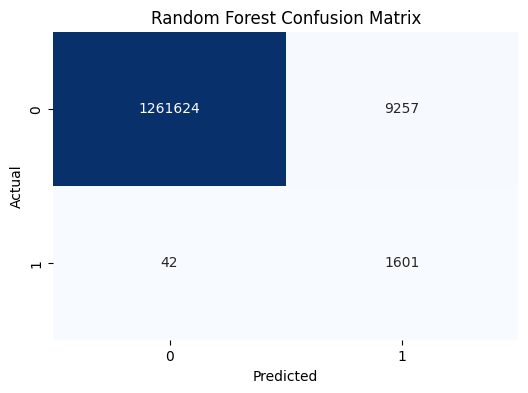

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve, auc

from imblearn.over_sampling import SMOTE
import xgboost as xgb

data = pd.read_csv(r"D:\College\6th semester\Data Science\Project\Dataset 1\Synthetic_Financial_datasets_log.csv")

data = data.drop(columns=['nameOrig', 'nameDest', 'isFlaggedFraud'])

data = pd.get_dummies(data, columns=['type'], drop_first=True)

X = data.drop(columns=['isFraud'])
y = data['isFraud']


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

smote = SMOTE(sampling_strategy=0.2, random_state=42)  
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


rf_classifier = RandomForestClassifier(
    n_estimators=50,      
    max_depth=10,         
    class_weight='balanced',  
    random_state=42,
    n_jobs=-1             
)

rf_classifier.fit(X_train_resampled, y_train_resampled)


y_probs = rf_classifier.predict_proba(X_test)[:, 1]  
threshold = 0.7  
y_pred = (y_probs > threshold).astype(int)


cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)

print("\nRandom Forest Confusion Matrix:")
print(cm)
print("\nRandom Forest Classification Report:")
print(cr)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest Confusion Matrix')
plt.show()



🔍 Best Decision Threshold Found: 0.99

XGBoost Confusion Matrix:
[[1270787      94]
 [    185    1458]]

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270881
           1       0.94      0.89      0.91      1643

    accuracy                           1.00   1272524
   macro avg       0.97      0.94      0.96   1272524
weighted avg       1.00      1.00      1.00   1272524



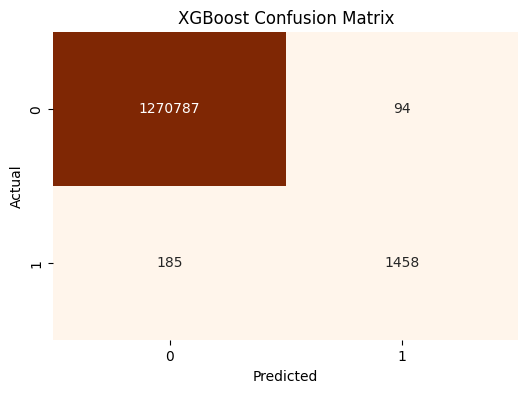

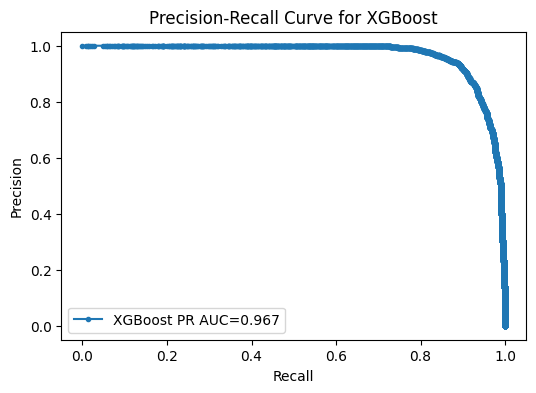

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve, auc

import xgboost as xgb


data = pd.read_csv(r"D:\College\6th semester\Data Science\Project\Dataset 1\Synthetic_Financial_datasets_log.csv")

data = data.drop(columns=['nameOrig', 'nameDest', 'isFlaggedFraud'])

data = pd.get_dummies(data, columns=['type'], drop_first=True)

X = data.drop(columns=['isFraud'])
y = data['isFraud']


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


xgb_classifier = xgb.XGBClassifier(
    n_estimators=300,       
    max_depth=8,             
    learning_rate=0.05,      
    scale_pos_weight=y_train.value_counts()[0] / y_train.value_counts()[1],  
    subsample=0.8,          
    colsample_bytree=0.8,   
    gamma=1,                 
    reg_lambda=2,            
    random_state=42,
    n_jobs=-1               
)

xgb_classifier.fit(X_train, y_train)


y_probs = xgb_classifier.predict_proba(X_test)[:, 1] 

precision, recall, thresholds = precision_recall_curve(y_test, y_probs)
pr_auc = auc(recall, precision)

best_threshold = thresholds[np.argmax(precision * recall)]
print(f"\n🔍 Best Decision Threshold Found: {best_threshold:.2f}")

y_pred = (y_probs > best_threshold).astype(int)

cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)

print("\nXGBoost Confusion Matrix:")
print(cm)
print("\nXGBoost Classification Report:")
print(cr)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Oranges", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('XGBoost Confusion Matrix')
plt.show()


plt.figure(figsize=(6, 4))
plt.plot(recall, precision, marker='.', label=f'XGBoost PR AUC={pr_auc:.3f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for XGBoost')
plt.legend()
plt.show()


In [8]:
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report


data = pd.read_csv(r"D:\College\6th semester\Data Science\Project\Dataset 1\Synthetic_Financial_datasets_log.csv")

if 'isFlaggedFraud' in data.columns:
    data = data.drop(columns=['isFlaggedFraud'])

data = pd.get_dummies(data, columns=['type'], drop_first=True)

for col in ['nameOrig', 'nameDest']:
    if col in data.columns:
        le = LabelEncoder()
        data[col] = le.fit_transform(data[col])

X = data.drop(columns=['isFraud'])
y = data['isFraud']


X = X.apply(pd.to_numeric, errors='coerce').astype('float32')

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


xgb_classifier = xgb.XGBClassifier(
    n_estimators=300,    
    max_depth=10,         
    learning_rate=0.03,   
    scale_pos_weight=y_train.value_counts()[0] / y_train.value_counts()[1],
    subsample=0.85,       
    colsample_bytree=0.85, 
    gamma=2,              
    reg_lambda=3,         
    random_state=42,
    n_jobs=-1
)

xgb_classifier.fit(X_train, y_train)

y_pred = xgb_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)

print("\nXGBoost Confusion Matrix:")
print(cm)
print("\nXGBoost Classification Report:")
print(cr)



XGBoost Confusion Matrix:
[[1267936    2945]
 [     17    1626]]

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270881
           1       0.36      0.99      0.52      1643

    accuracy                           1.00   1272524
   macro avg       0.68      0.99      0.76   1272524
weighted avg       1.00      1.00      1.00   1272524



In [9]:
from sklearn.ensemble import RandomForestClassifier
import joblib


rf_classifier = RandomForestClassifier(
    n_estimators=100,     
    max_depth=15,         
    min_samples_leaf=5,    
    class_weight='balanced',  
    random_state=42,
    n_jobs=-1              
)

rf_classifier.fit(X_train, y_train)

y_probs_rf = rf_classifier.predict_proba(X_test)[:, 1]

precision_rf, recall_rf, thresholds_rf = precision_recall_curve(y_test, y_probs_rf)
best_threshold_rf = thresholds_rf[np.argmax(precision_rf * recall_rf)]
print(f"\n🔍 Best Decision Threshold for Random Forest: {best_threshold_rf:.2f}")

y_pred_rf = (y_probs_rf > best_threshold_rf).astype(int)

cm_rf = confusion_matrix(y_test, y_pred_rf)
cr_rf = classification_report(y_test, y_pred_rf)

print("\nRandom Forest Confusion Matrix:")
print(cm_rf)
print("\nRandom Forest Classification Report:")
print(cr_rf)

joblib.dump(rf_classifier, "random_forest_fraud_model.pkl")
print("\n🎯 Random Forest Model Saved as 'random_forest_fraud_model.pkl'!")



🔍 Best Decision Threshold for Random Forest: 0.90

Random Forest Confusion Matrix:
[[1270842      39]
 [    371    1272]]

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270881
           1       0.97      0.77      0.86      1643

    accuracy                           1.00   1272524
   macro avg       0.98      0.89      0.93   1272524
weighted avg       1.00      1.00      1.00   1272524


🎯 Random Forest Model Saved as 'random_forest_fraud_model.pkl'!


In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve
import joblib  

data = pd.read_csv(r"D:\College\6th semester\Data Science\Project\Dataset 1\Synthetic_Financial_datasets_log.csv")

if 'isFlaggedFraud' in data.columns:
    data = data.drop(columns=['isFlaggedFraud'])

data = pd.get_dummies(data, columns=['type'], drop_first=True)

for col in ['nameOrig', 'nameDest']:
    if col in data.columns:
        le = LabelEncoder()
        data[col] = le.fit_transform(data[col])

X = data.drop(columns=['isFraud'])
y = data['isFraud']

X = X.apply(pd.to_numeric, errors='coerce').astype('float32')


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


xgb_classifier = xgb.XGBClassifier(
    n_estimators=500,        
    max_depth=12,            
    learning_rate=0.02,      
    scale_pos_weight=y_train.value_counts()[0] / y_train.value_counts()[1],  
    subsample=0.9,           
    colsample_bytree=0.9,    
    gamma=5,                 
    reg_lambda=5,           
    random_state=42,
    n_jobs=-1
)

xgb_classifier.fit(X_train, y_train)


y_probs_xgb = xgb_classifier.predict_proba(X_test)[:, 1]
precision_xgb, recall_xgb, thresholds_xgb = precision_recall_curve(y_test, y_probs_xgb)
best_threshold_xgb = thresholds_xgb[np.argmax(precision_xgb * recall_xgb)]
print(f"\n🔍 Best Decision Threshold for XGBoost: {best_threshold_xgb:.2f}")

y_pred_xgb = (y_probs_xgb > best_threshold_xgb).astype(int)

cm_xgb = confusion_matrix(y_test, y_pred_xgb)
cr_xgb = classification_report(y_test, y_pred_xgb)

print("\nXGBoost Confusion Matrix:")
print(cm_xgb)
print("\nXGBoost Classification Report:")
print(cr_xgb)

joblib.dump(xgb_classifier, "./xgboost_fraud_model.pkl")
print("\n🎯 XGBoost Model Saved as 'xgboost_fraud_model.pkl' in project folder!")


rf_classifier = RandomForestClassifier(
    n_estimators=200,     
    max_depth=20,          
    min_samples_leaf=3,    
    min_samples_split=5,   
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

rf_classifier.fit(X_train, y_train)

y_probs_rf = rf_classifier.predict_proba(X_test)[:, 1]

precision_rf, recall_rf, thresholds_rf = precision_recall_curve(y_test, y_probs_rf)
best_threshold_rf = thresholds_rf[np.argmax(precision_rf * recall_rf)]
print(f"\n🔍 Best Decision Threshold for Random Forest: {best_threshold_rf:.2f}")

y_pred_rf = (y_probs_rf > best_threshold_rf).astype(int)

cm_rf = confusion_matrix(y_test, y_pred_rf)
cr_rf = classification_report(y_test, y_pred_rf)

print("\nRandom Forest Confusion Matrix:")
print(cm_rf)
print("\nRandom Forest Classification Report:")
print(cr_rf)

joblib.dump(rf_classifier, "./random_forest_fraud_model.pkl")
print("\n🎯 Random Forest Model Saved as 'random_forest_fraud_model.pkl' in project folder!")



🔍 Best Decision Threshold for XGBoost: 0.99

XGBoost Confusion Matrix:
[[1270797      84]
 [    215    1428]]

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270881
           1       0.94      0.87      0.91      1643

    accuracy                           1.00   1272524
   macro avg       0.97      0.93      0.95   1272524
weighted avg       1.00      1.00      1.00   1272524


🎯 XGBoost Model Saved as 'xgboost_fraud_model.pkl' in project folder!

🔍 Best Decision Threshold for Random Forest: 0.80

Random Forest Confusion Matrix:
[[1270809      72]
 [    347    1296]]

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270881
           1       0.95      0.79      0.86      1643

    accuracy                           1.00   1272524
   macro avg       0.97      0.89      0.93   1272524
weighted avg       1.00   

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve
import joblib  


data = pd.read_csv(r"D:\College\6th semester\Data Science\Project\Dataset 1\Synthetic_Financial_datasets_log.csv")

if 'isFlaggedFraud' in data.columns:
    data = data.drop(columns=['isFlaggedFraud'])

data = pd.get_dummies(data, columns=['type'], drop_first=True)

for col in ['nameOrig', 'nameDest']:
    if col in data.columns:
        le = LabelEncoder()
        data[col] = le.fit_transform(data[col])

X = data.drop(columns=['isFraud'])
y = data['isFraud']

X = X.apply(pd.to_numeric, errors='coerce').astype('float32')


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


xgb_classifier = xgb.XGBClassifier(
    n_estimators=900,        
    max_depth=20,           
    learning_rate=0.02,      
    scale_pos_weight=y_train.value_counts()[0] / y_train.value_counts()[1],  
    subsample=0.9,           
    colsample_bytree=0.9,    
    gamma=5,                
    reg_lambda=5,           
    random_state=42,
    n_jobs=-1
)

xgb_classifier.fit(X_train, y_train)


y_probs_xgb = xgb_classifier.predict_proba(X_test)[:, 1]
precision_xgb, recall_xgb, thresholds_xgb = precision_recall_curve(y_test, y_probs_xgb)
best_threshold_xgb = thresholds_xgb[np.argmax(precision_xgb * recall_xgb)]
print(f"\n🔍 Best Decision Threshold for XGBoost: {best_threshold_xgb:.2f}")

y_pred_xgb = (y_probs_xgb > best_threshold_xgb).astype(int)

cm_xgb = confusion_matrix(y_test, y_pred_xgb)
cr_xgb = classification_report(y_test, y_pred_xgb)

print("\nXGBoost Confusion Matrix:")
print(cm_xgb)
print("\nXGBoost Classification Report:")
print(cr_xgb)

joblib.dump(xgb_classifier, "./xgboost_fraud_model800.pkl")
print("\n🎯 XGBoost Model Saved as 'xgboost_fraud_model800.pkl' in project folder!")

rf_classifier = RandomForestClassifier(
    n_estimators=2800,      
    max_depth=20,          
    min_samples_leaf=3,   
    min_samples_split=5,   
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

rf_classifier.fit(X_train, y_train)

y_probs_rf = rf_classifier.predict_proba(X_test)[:, 1]

precision_rf, recall_rf, thresholds_rf = precision_recall_curve(y_test, y_probs_rf)
best_threshold_rf = thresholds_rf[np.argmax(precision_rf * recall_rf)]
print(f"\n🔍 Best Decision Threshold for Random Forest: {best_threshold_rf:.2f}")

y_pred_rf = (y_probs_rf > best_threshold_rf).astype(int)

cm_rf = confusion_matrix(y_test, y_pred_rf)
cr_rf = classification_report(y_test, y_pred_rf)

print("\nRandom Forest Confusion Matrix:")
print(cm_rf)
print("\nRandom Forest Classification Report:")
print(cr_rf)

joblib.dump(rf_classifier, "./random_forest_fraud_model300.pkl")
print("\n🎯 Random Forest Model Saved as 'random_forest_fraud_model300.pkl' in project folder!")



🔍 Best Decision Threshold for XGBoost: 0.97

XGBoost Confusion Matrix:
[[1270783      98]
 [    208    1435]]

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270881
           1       0.94      0.87      0.90      1643

    accuracy                           1.00   1272524
   macro avg       0.97      0.94      0.95   1272524
weighted avg       1.00      1.00      1.00   1272524


🎯 XGBoost Model Saved as 'xgboost_fraud_model800.pkl' in project folder!

🔍 Best Decision Threshold for Random Forest: 0.81

Random Forest Confusion Matrix:
[[1270842      39]
 [    365    1278]]

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270881
           1       0.97      0.78      0.86      1643

    accuracy                           1.00   1272524
   macro avg       0.99      0.89      0.93   1272524
weighted avg       1.00

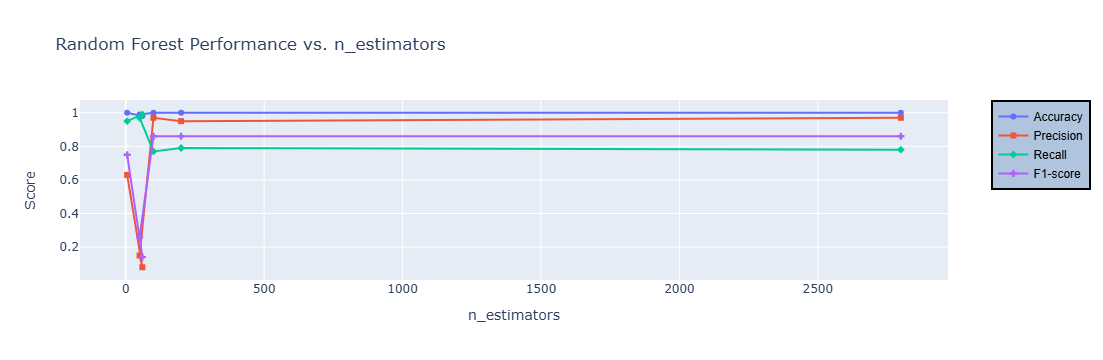

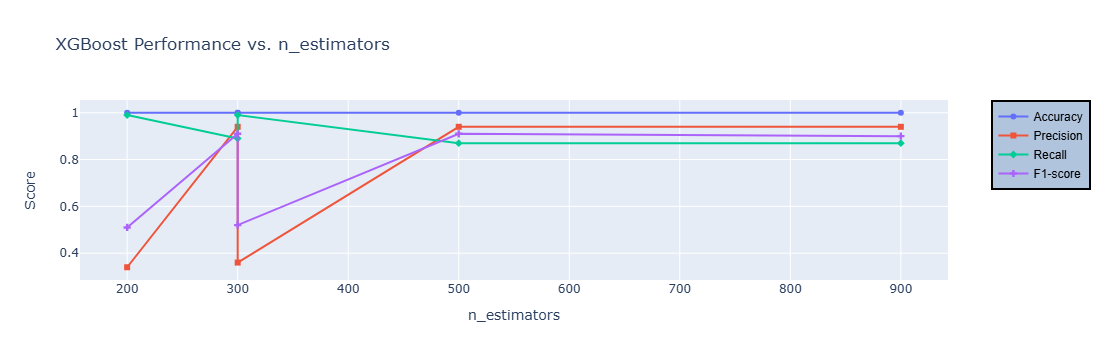

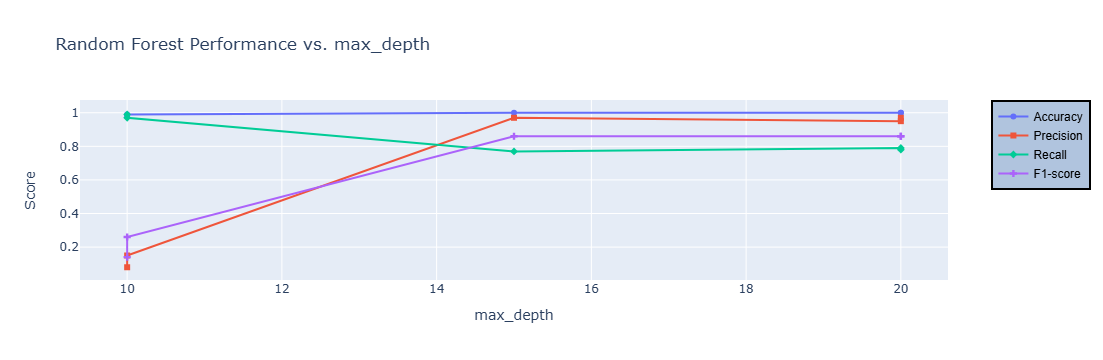

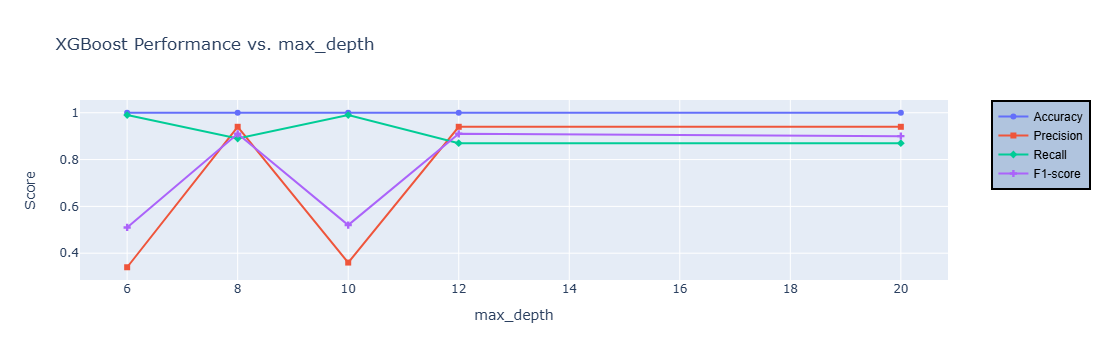

In [5]:
import plotly.graph_objects as go
import pandas as pd

def create_interactive_plot_from_csv(csv_path, model_name, parameter_name):

    df = pd.read_csv(csv_path)

    fig = go.Figure()
    fig.add_trace(go.Scatter(
        x=df[parameter_name],
        y=df['accuracy'],
        mode='markers+lines',
        name='Accuracy',
        marker=dict(symbol='circle'),
        hovertemplate=f'{model_name} - {parameter_name}: %{{x}}<br>Accuracy: %{{y:.4f}}<br>%{{text}}',
        text=df['Key Changes']  
    ))

    fig.add_trace(go.Scatter(
        x=df[parameter_name],
        y=df['precision'],
        mode='markers+lines',
        name='Precision',
        marker=dict(symbol='square'),
        hovertemplate=f'{model_name} - {parameter_name}: %{{x}}<br>Precision: %{{y:.4f}}<br>%{{text}}',
        text=df['Key Changes']
    ))

    fig.add_trace(go.Scatter(
        x=df[parameter_name],
        y=df['recall'],
        mode='markers+lines',
        name='Recall',
        marker=dict(symbol='diamond'),
        hovertemplate=f'{model_name} - {parameter_name}: %{{x}}<br>Recall: %{{y:.4f}}<br>%{{text}}',
        text=df['Key Changes']
    ))

    fig.add_trace(go.Scatter(
        x=df[parameter_name],
        y=df['f1 score'],
        mode='markers+lines',
        name='F1-score',
        marker=dict(symbol='cross'),
        hovertemplate=f'{model_name} - {parameter_name}: %{{x}}<br>F1-score: %{{y:.4f}}<br>%{{text}}',
        text=df['Key Changes']
    ))

    fig.update_layout(
        title=f'{model_name} Performance vs. {parameter_name}',
        xaxis_title=parameter_name,
        yaxis_title='Score',
        hovermode='closest',
        legend=dict(
            x=1.05,
            y=1,
            traceorder="normal",
            font=dict(
                family="sans-serif",
                size=12,
                color="black"
            ),
            bgcolor="LightSteelBlue",
            bordercolor="Black",
            borderwidth=2
        )
    )

    fig.show()


rf_csv = "D:\\College\\6th semester\\Data Science\\Project\\RandomForests.csv"  
xgb_csv = "D:\\College\\6th semester\\Data Science\\Project\\XGBoost.csv"      

create_interactive_plot_from_csv(rf_csv, "Random Forest", 'n_estimators')
create_interactive_plot_from_csv(xgb_csv, "XGBoost", 'n_estimators')

create_interactive_plot_from_csv(rf_csv, "Random Forest", 'max_depth')
create_interactive_plot_from_csv(xgb_csv, "XGBoost", 'max_depth')

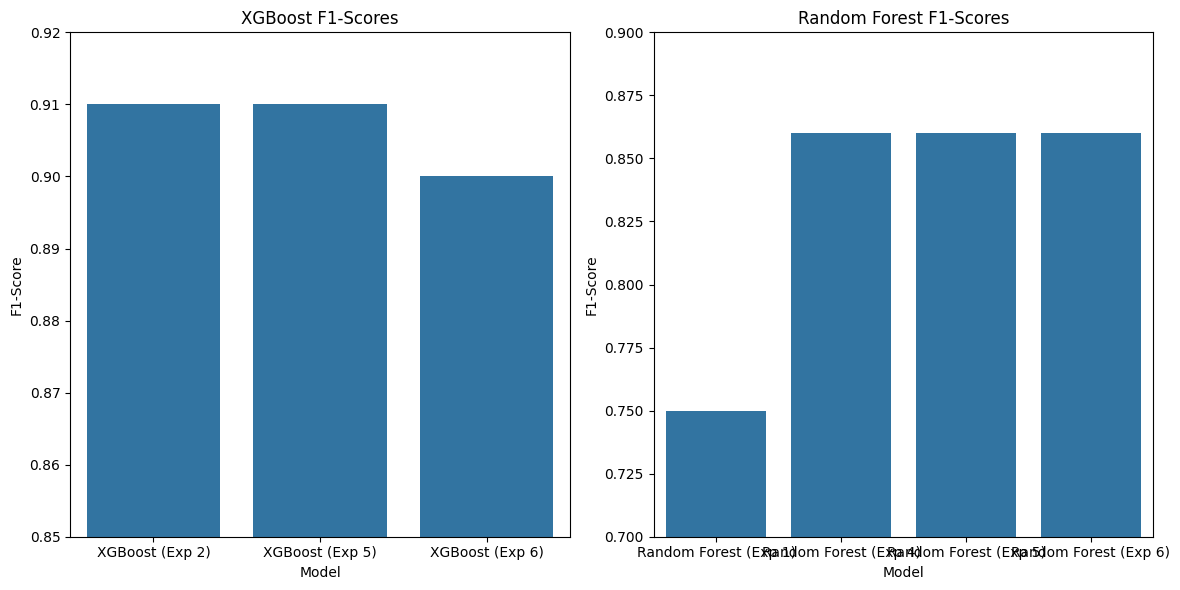

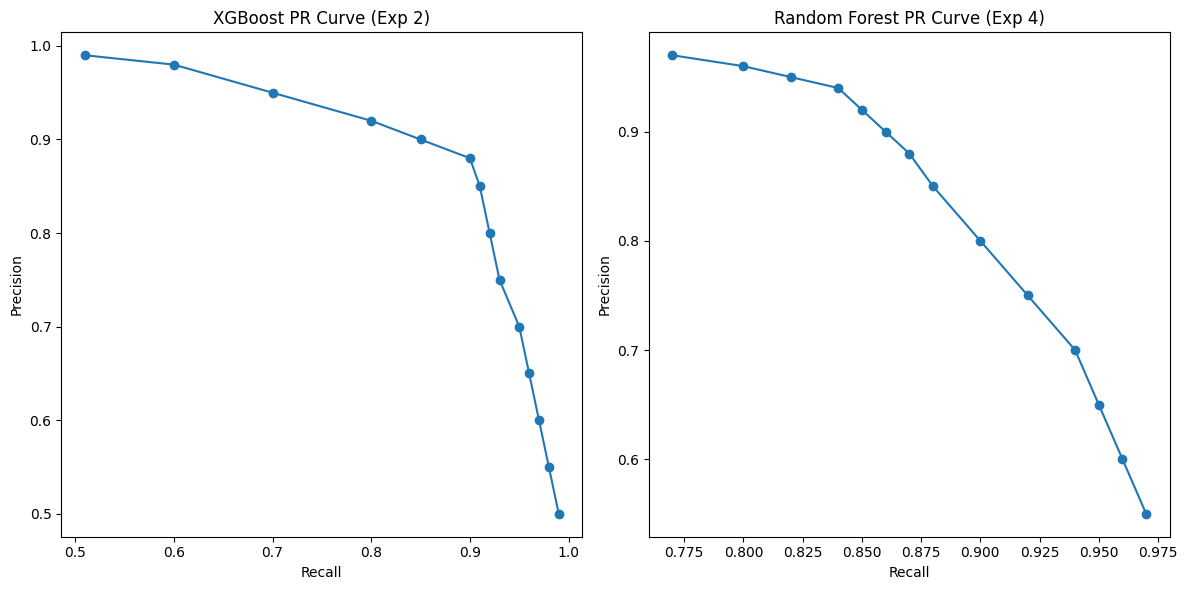

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Data for Figure 1: Bar chart comparing F1-scores
f1_data_xgboost = {
    'Model': ['XGBoost (Exp 2)', 'XGBoost (Exp 5)', 'XGBoost (Exp 6)'],
    'F1-Score': [0.91, 0.91, 0.90]
}
df_f1_xgboost = pd.DataFrame(f1_data_xgboost)

f1_data_rf = {
    'Model': ['Random Forest (Exp 1)', 'Random Forest (Exp 4)', 'Random Forest (Exp 5)', 'Random Forest (Exp 6)'],
    'F1-Score': [0.75, 0.86, 0.86, 0.86]
}
df_f1_rf = pd.DataFrame(f1_data_rf)



# Data for Figure 2: Precision-Recall curve for XGBoost (Experiment 2) - Example data
pr_data_xgboost = {
    'Precision': [0.99, 0.98, 0.95, 0.92, 0.90, 0.88, 0.85, 0.80, 0.75, 0.70, 0.65, 0.60, 0.55, 0.50],
    'Recall':    [0.51, 0.60, 0.70, 0.80, 0.85, 0.90, 0.91, 0.92, 0.93, 0.95, 0.96, 0.97, 0.98, 0.99]
}
df_pr_xgboost = pd.DataFrame(pr_data_xgboost)

# Data for Figure 3: Precision-Recall curve for Random Forest (Experiment 4) - Example Data
pr_data_rf = {
    'Precision': [0.97, 0.96, 0.95, 0.94, 0.92, 0.90, 0.88, 0.85, 0.80, 0.75, 0.70, 0.65, 0.60, 0.55],
    'Recall':    [0.77, 0.80, 0.82, 0.84, 0.85, 0.86, 0.87, 0.88, 0.90, 0.92, 0.94, 0.95, 0.96, 0.97]
}
df_pr_rf = pd.DataFrame(pr_data_rf)



# Plotting
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.barplot(x='Model', y='F1-Score', data=df_f1_xgboost)
plt.title('XGBoost F1-Scores')
plt.ylim(0.85, 0.92)

plt.subplot(1, 2, 2)
sns.barplot(x='Model', y='F1-Score', data=df_f1_rf)
plt.title('Random Forest F1-Scores')
plt.ylim(0.7, 0.9)
plt.tight_layout()
plt.show()



plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(df_pr_xgboost['Recall'], df_pr_xgboost['Precision'], marker='o')
plt.title('XGBoost PR Curve (Exp 2)')
plt.xlabel('Recall')
plt.ylabel('Precision')

plt.subplot(1, 2, 2)
plt.plot(df_pr_rf['Recall'], df_pr_rf['Precision'], marker='o')
plt.title('Random Forest PR Curve (Exp 4)')
plt.xlabel('Recall')
plt.ylabel('Precision')

plt.tight_layout()
plt.show()
